In [24]:
import pandas as pd
import numpy as np
import string
import random
import matplotlib.pyplot as plt
import time

In [25]:
#Creating a list of user_id
def create_user_id(num):
    user_id = [''.join(random.choices(string.digits, k=10)) for i in range(num)]
    return user_id


#Generating Random date and time
def random_date_and_time(start, end, n):
    return pd.to_datetime(np.random.randint(start.value//(1e9),end.value//(1e9),n), unit='s')


#Matching the user_id and date 
def exact_user_id(user, n):
    user_id2 = []
    m = len(user)
    for i in range(n):
        temp = (np.random.randint(0,9999999))%m
        user_id2.append(user[temp])
    return user_id2


In [26]:
print("Number of users:")
n = int(input())
print('Preferred size of dataset:')
m = int(input())

Number of users:
1000
Preferred size of dataset:
4000


In [27]:
# start and end date time
start = pd.to_datetime('2021-01-01')
end = pd.to_datetime('2021-02-01')

In [28]:
#Generating all the array
userId = create_user_id(n)
date = random_date_and_time(start,end,m)
date = date.sort_values()
user_id = exact_user_id(userId,m)

In [29]:
df = pd.DataFrame({'user_id': user_id, 'login_date_time': date, 'event_name':'app_open'})

In [30]:
df.head()

,user_id,login_date_time,event_name
0,5421422666,2021-01-01 00:06:43,app_open
1,6147948537,2021-01-01 00:11:50,app_open
2,0660028638,2021-01-01 00:20:47,app_open
3,3546796468,2021-01-01 00:23:06,app_open
4,6447107981,2021-01-01 00:24:14,app_open


In [31]:
df.shape

(4000, 3)

In [32]:
df.to_csv("output_task_1.csv", index=False)

In [33]:
start = time.time()

#Grouping data on basis of user_id
df_user_group = df.groupby('user_id')

#Age data to store the day difference
#Using goup by, 0th row and last row in that
user_age_data = {}

#Login Count store for any User 
#Using group by and shape[0]
login_count_data = {}

for user_itr, user_itr_df  in df_user_group:
    login_count = user_itr_df.shape[0]
    
    #If user has logged in only 1 time
    if login_count == 1:
        user_age_data[user_itr] = 1
    else:
        user_age_data[user_itr] = (user_itr_df.iloc[login_count-1]["login_date_time"] - user_itr_df.iloc[0]["login_date_time"]).days + 1
    
    #Using the group by to get the unique dates on which user logged in i.e. logged in same day twice will be counted as one login.
    df_user_login_count = user_itr_df.groupby([user_itr_df['login_date_time'].dt.date])
    login_count_data[user_itr] = len(df_user_login_count)

    
end = time.time()

print("Running time:", end-start)

Running time: {3.110914945602417}


In [36]:
start = time.time()

#Storing the frequency of users that are active in a particular time period of 0-1, 1-2, ...
login_freq = [ 0 for i in range(24)]

#Login Time grouping
df_login_count_group = df.groupby([df['login_date_time'].dt.hour])

#Storing the frequency of time period using the generated dataframe in groupby
for time_group, group_count in df_login_count_group:
    login_freq[time_group] = group_count.shape[0]
    
end = time.time()

print("Running time:", end-start)

Running time: 0.012569665908813477


In [13]:
#Saving the Login count for the users
df_count = pd.DataFrame(login_count_data.items(), columns=['user_id', 'login_count'])
df_count.to_csv("login_count.csv",index=False)

In [14]:
#The frequency of day wise
age_data = [ 0 for _ in range(7)]

for key, val in user_age_data.items():
    #print(val)
    if val>=11 and val<=20:
        age_data[6] += 1
    elif val<11 and val>=6:
        age_data[5] += 1
    elif val<6:
        age_data[val-1] += 1

In [15]:
#Percentage generation for the dataframe
age_data_percent = [round((age_data[i]*100)/len(user_age_data),2) for i in range(7)]

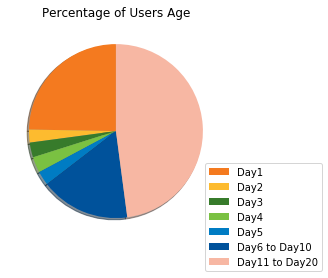

In [16]:
#Pie chart on distribution of User Age
age_data_col_name = ['Day1','Day2','Day3','Day4','Day5','Day6 to Day10','Day11 to Day20']
color_col = ['#F47A1F','#FDBB2F','#377B2B','#7AC142','#007CC3','#00529B','#F7B7A3']
plt.pie(age_data,colors=color_col,startangle=90,shadow=True)
plt.legend(labels=age_data_col_name,bbox_to_anchor=(1,0), loc="lower right",bbox_transform=plt.gcf().transFigure)
plt.title("Percentage of Users Age")
plt.show()

In [17]:
df_age = pd.DataFrame({'% users':age_data_percent, 'Age': age_data_col_name})
df_age['% users'] = df_age['% users'].astype(str) + '%'

In [18]:
df_age

,% users,Age
0,16.95%,Day1
1,1.65%,Day2
2,1.89%,Day3
3,2.01%,Day4
4,1.8%,Day5
5,11.42%,Day6 to Day10
6,32.85%,Day11 to Day20


In [19]:
#Saving the age percentage to a csv
df_age.to_csv("user_age.csv", index=False)

In [20]:
#Login frequency of all the users to get the detail at which time users are most active 
login_freq_dict = { str(i)+"-"+str(i+1):login_freq[i] for i in range(23)}
login_freq_dict['23-0'] = login_freq[23]
login_freq_dict

{'0-1': 1247,
 '1-2': 1261,
 '2-3': 1253,
 '3-4': 1270,
 '4-5': 1244,
 '5-6': 1249,
 '6-7': 1241,
 '7-8': 1270,
 '8-9': 1243,
 '9-10': 1202,
 '10-11': 1232,
 '11-12': 1248,
 '12-13': 1199,
 '13-14': 1314,
 '14-15': 1246,
 '15-16': 1233,
 '16-17': 1244,
 '17-18': 1236,
 '18-19': 1302,
 '19-20': 1298,
 '20-21': 1240,
 '21-22': 1249,
 '22-23': 1256,
 '23-0': 1223}

In [21]:
#Getting the top 5 time interval in which users are most active
login_top = {k: v for k, v in sorted(login_freq_dict.items(), key=lambda item: item[1], reverse=True)}
login_top_5 = {k: login_top[k] for k in list(login_top)[:5]}
login_top_5_colour = []
for k in login_freq_dict.keys():
    if k in login_top_5.keys():
        login_top_5_colour.append('r')
    else:
        login_top_5_colour.append('grey')        

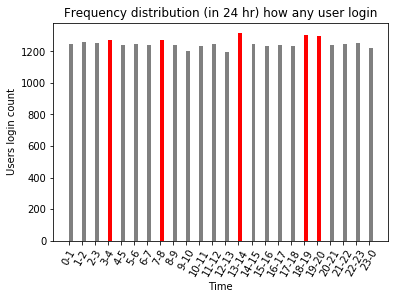

In [22]:
#Red shows the top 5 users engagement time.
plt.bar(login_freq_dict.keys(),login_freq_dict.values(), align='edge', width=0.3, color=login_top_5_colour)
plt.title("Frequency distribution (in 24 hr) how any user login")
plt.ylabel("Users login count")
plt.xlabel("Time")
plt.xticks(rotation=60)
plt.show()